# Project Team ID : PTID-CDS-DEC-23-1718
# Project Code : PRCP-1016-HeartDieseasePred
# Project Name : Predictions of heart diseases


# Problem statement
- use relevant machine learning model to predict whether person is having heart disease or not having heart disease

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df=pd.read_csv('values.csv')
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
df1=pd.read_csv('labels.csv')
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
dataframe=df.merge(df1,on="patient_id")

# Basic checks

In [5]:
dataframe.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


In [6]:
dataframe.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [7]:
#check number of rows and columns
dataframe.shape

(180, 15)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [9]:
dataframe.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
dataframe.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [11]:
dataframe.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [12]:
dataframe.heart_disease_present.unique()

array([0, 1], dtype=int64)

# Check for distribution of data

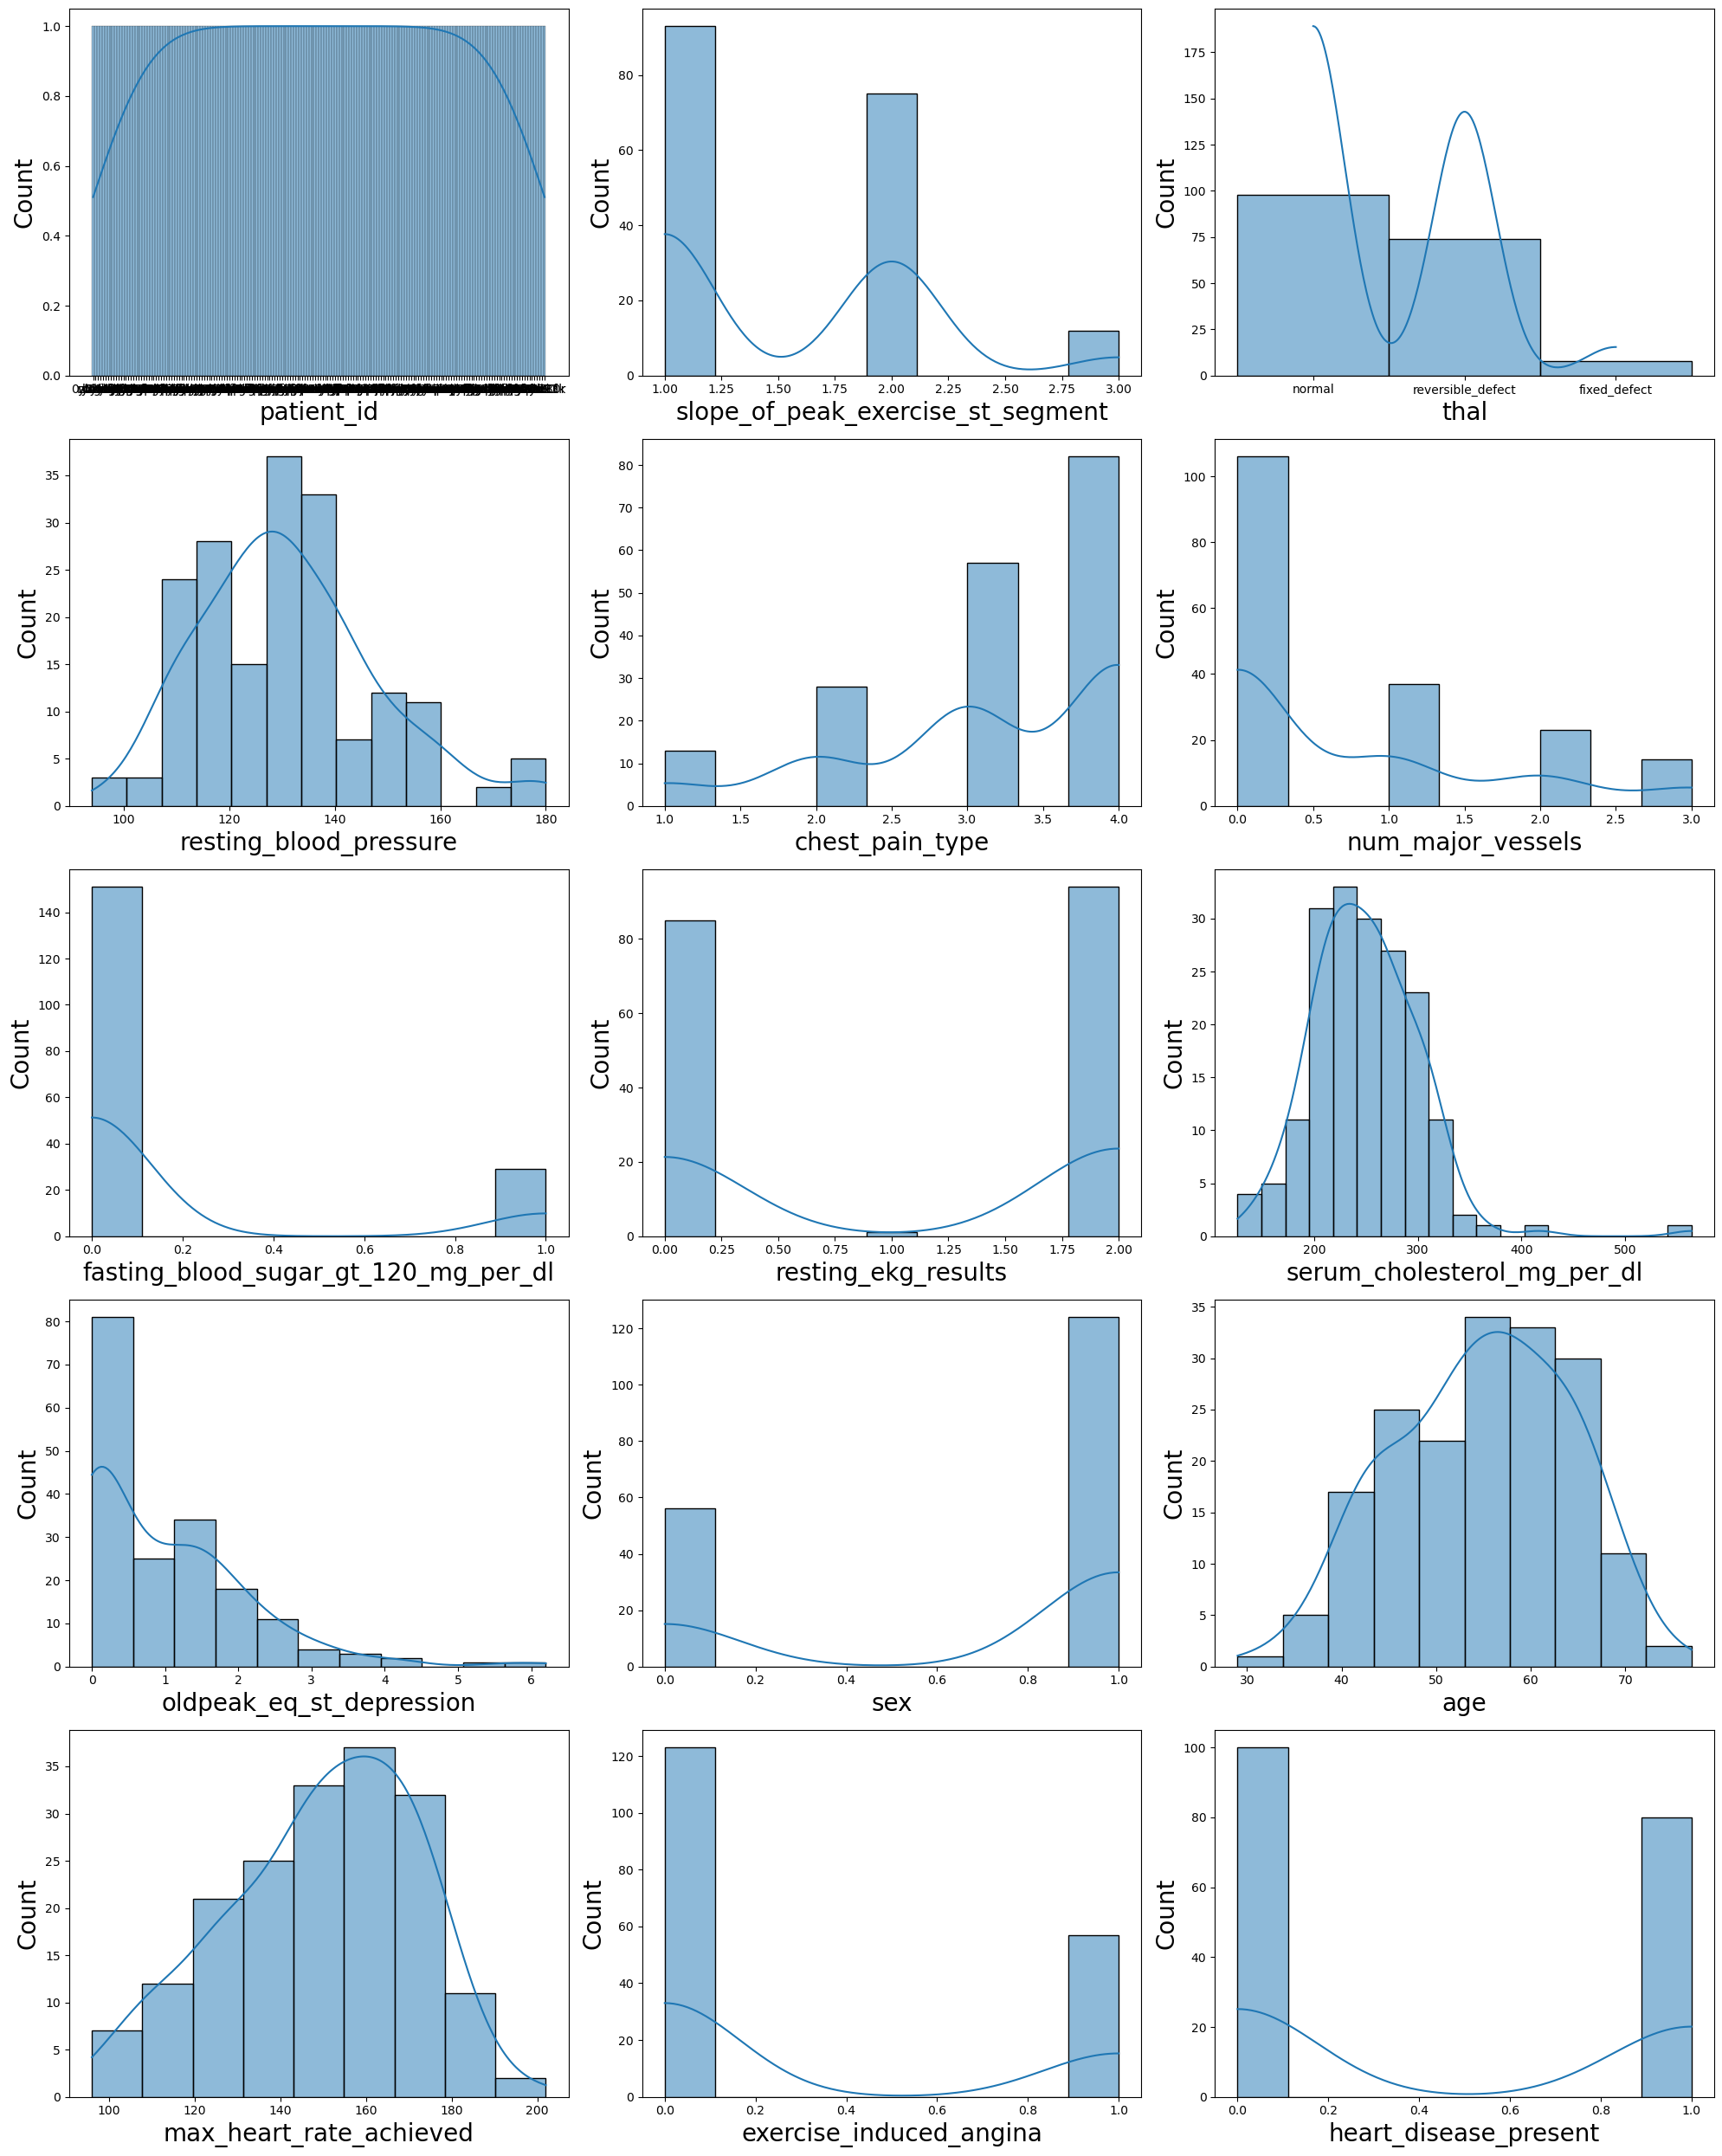

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in dataframe:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(dataframe[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

# Exploratory data Analysis

# Univariate
- hist plot is used to check the distribution of data
- count plot is used to check whether data is balanced or not

<Axes: xlabel='heart_disease_present', ylabel='count'>

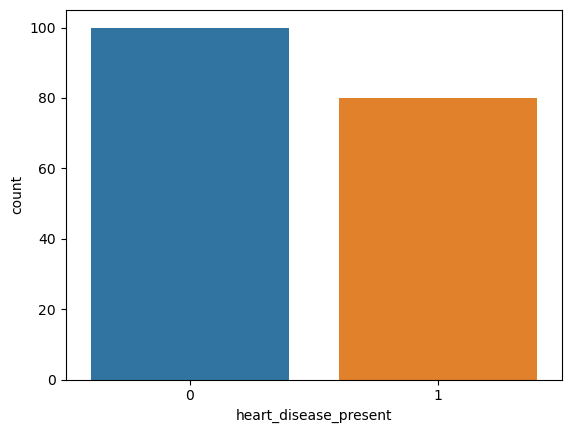

In [14]:
#check whether data is balanced or not 
#data balanced: Equal number of records related to having heart disease and not having heart disease patients
sns.countplot(x=dataframe.heart_disease_present)

# insights 
- clearly data is Imbalanced since we have more records related to non heart disease patients and less records related to heart disease

# Bivariate

<Axes: xlabel='chest_pain_type', ylabel='count'>

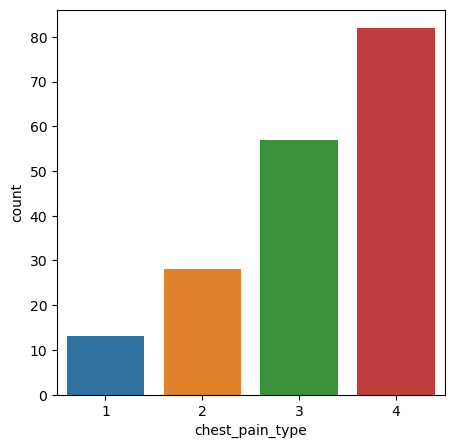

In [15]:
#analyse how chest pain will impact heart disease
plt.figure(figsize=(5,5))
sns.countplot(data=dataframe,x='chest_pain_type')

<Axes: xlabel='chest_pain_type', ylabel='count'>

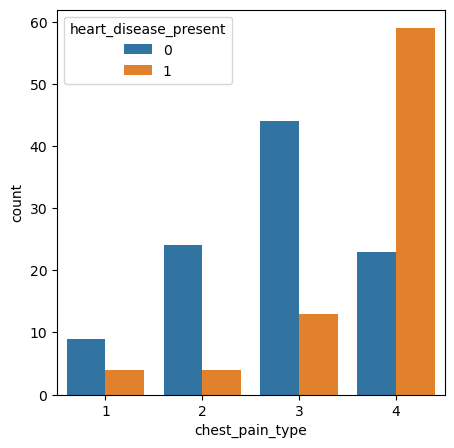

In [16]:
#analyse how chest pain will impact heart disease
plt.figure(figsize=(5,5))
sns.countplot(data=dataframe,x='chest_pain_type',hue='heart_disease_present')


# insights
- As the chest pain type is high, the probability of having heart disease is also high
- As the chest pain type is less, the probability of having heart disease is less

<Axes: xlabel='thal', ylabel='Count'>

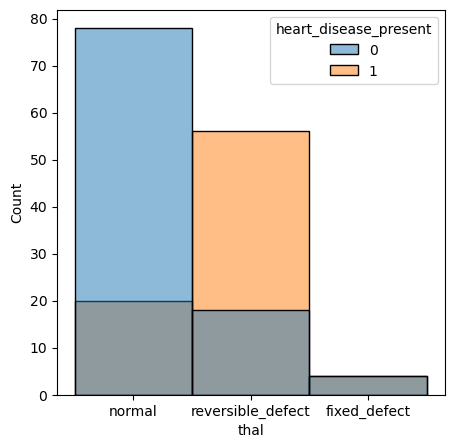

In [17]:
#analyse relationship between thal and heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe,x='thal',hue='heart_disease_present')

# insights
- In thal-reversible defect patients are having high chance of having heart disease present with count of >20
- Normal thal with count of average is consider as low chance of having heart disease present

<Axes: xlabel='num_major_vessels', ylabel='Count'>

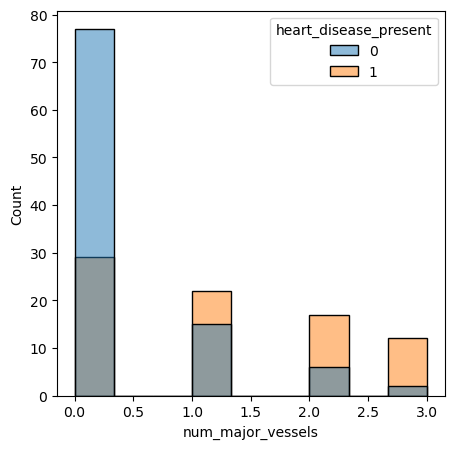

In [18]:
#analyse relationship between maximum number of major vessels and heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe,x='num_major_vessels',hue='heart_disease_present')

# insight
- As number of major vessels increases then patients having heart disease decreases

<Axes: xlabel='resting_ekg_results', ylabel='Count'>

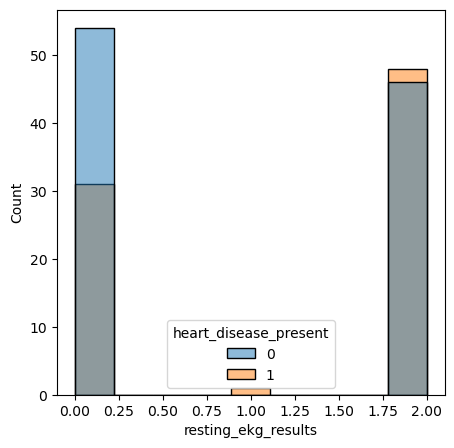

In [19]:
#analyse relationship between resting ekg results and heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe,x='resting_ekg_results',hue='heart_disease_present')

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='Count'>

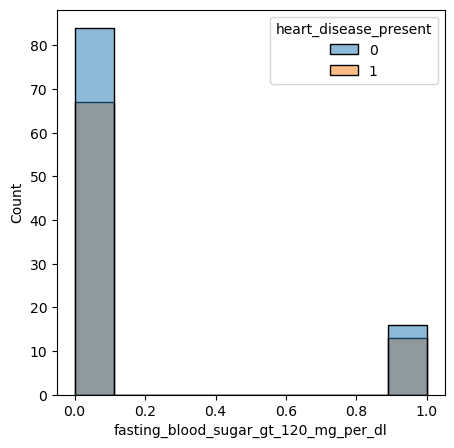

In [20]:
#analyse relationship between fasting blood sugar and heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe,x='fasting_blood_sugar_gt_120_mg_per_dl',hue='heart_disease_present')

<Axes: xlabel='age', ylabel='resting_blood_pressure'>

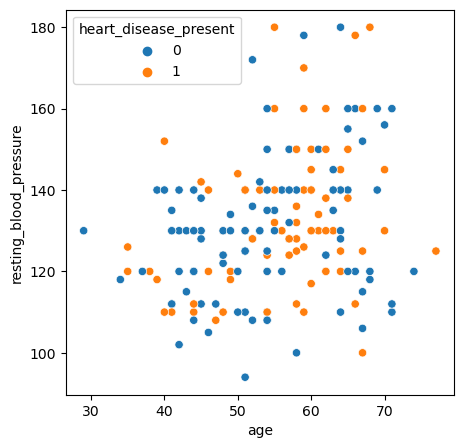

In [21]:
#analyse age with resting blood pressure
plt.figure(figsize=(5,5))
sns.scatterplot(data=dataframe,x='age',y='resting_blood_pressure',hue='heart_disease_present') 

# insights
- patients age between 40-60 with resting blood pressure >120 consider having high chances of heart disease

<Axes: xlabel='chest_pain_type', ylabel='resting_blood_pressure'>

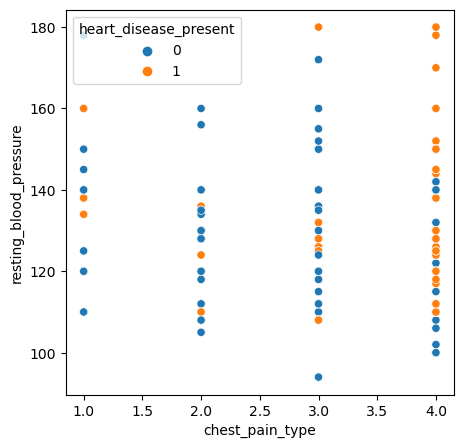

In [22]:
#analyse chest pain with resting blood pressure
plt.figure(figsize=(5,5))
sns.scatterplot(data=dataframe,x='chest_pain_type',y='resting_blood_pressure',hue='heart_disease_present') 

# insights
- patients with chest pain type 4 and resting blood pressure >120 are having high chance of heart disease

<Axes: xlabel='exercise_induced_angina', ylabel='slope_of_peak_exercise_st_segment'>

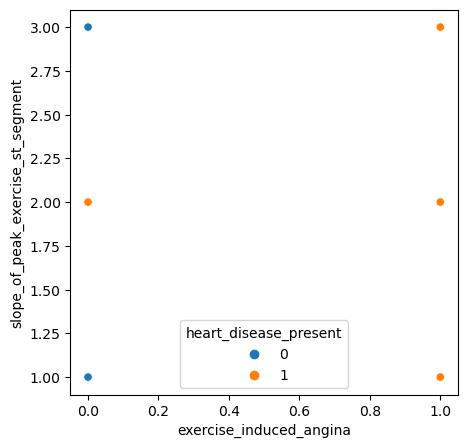

In [23]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=dataframe,x='exercise_induced_angina',y='slope_of_peak_exercise_st_segment',hue='heart_disease_present') 

<Axes: xlabel='age', ylabel='sex'>

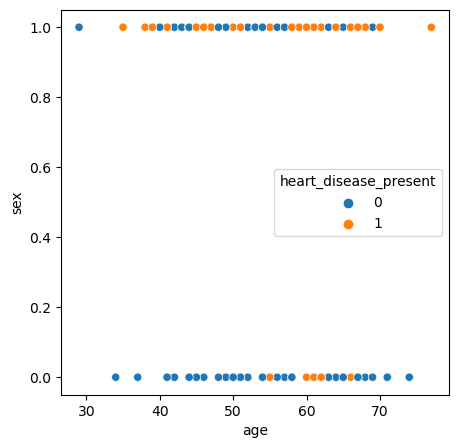

In [24]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=dataframe,x='age',y='sex',hue='heart_disease_present') 

# Multivariate

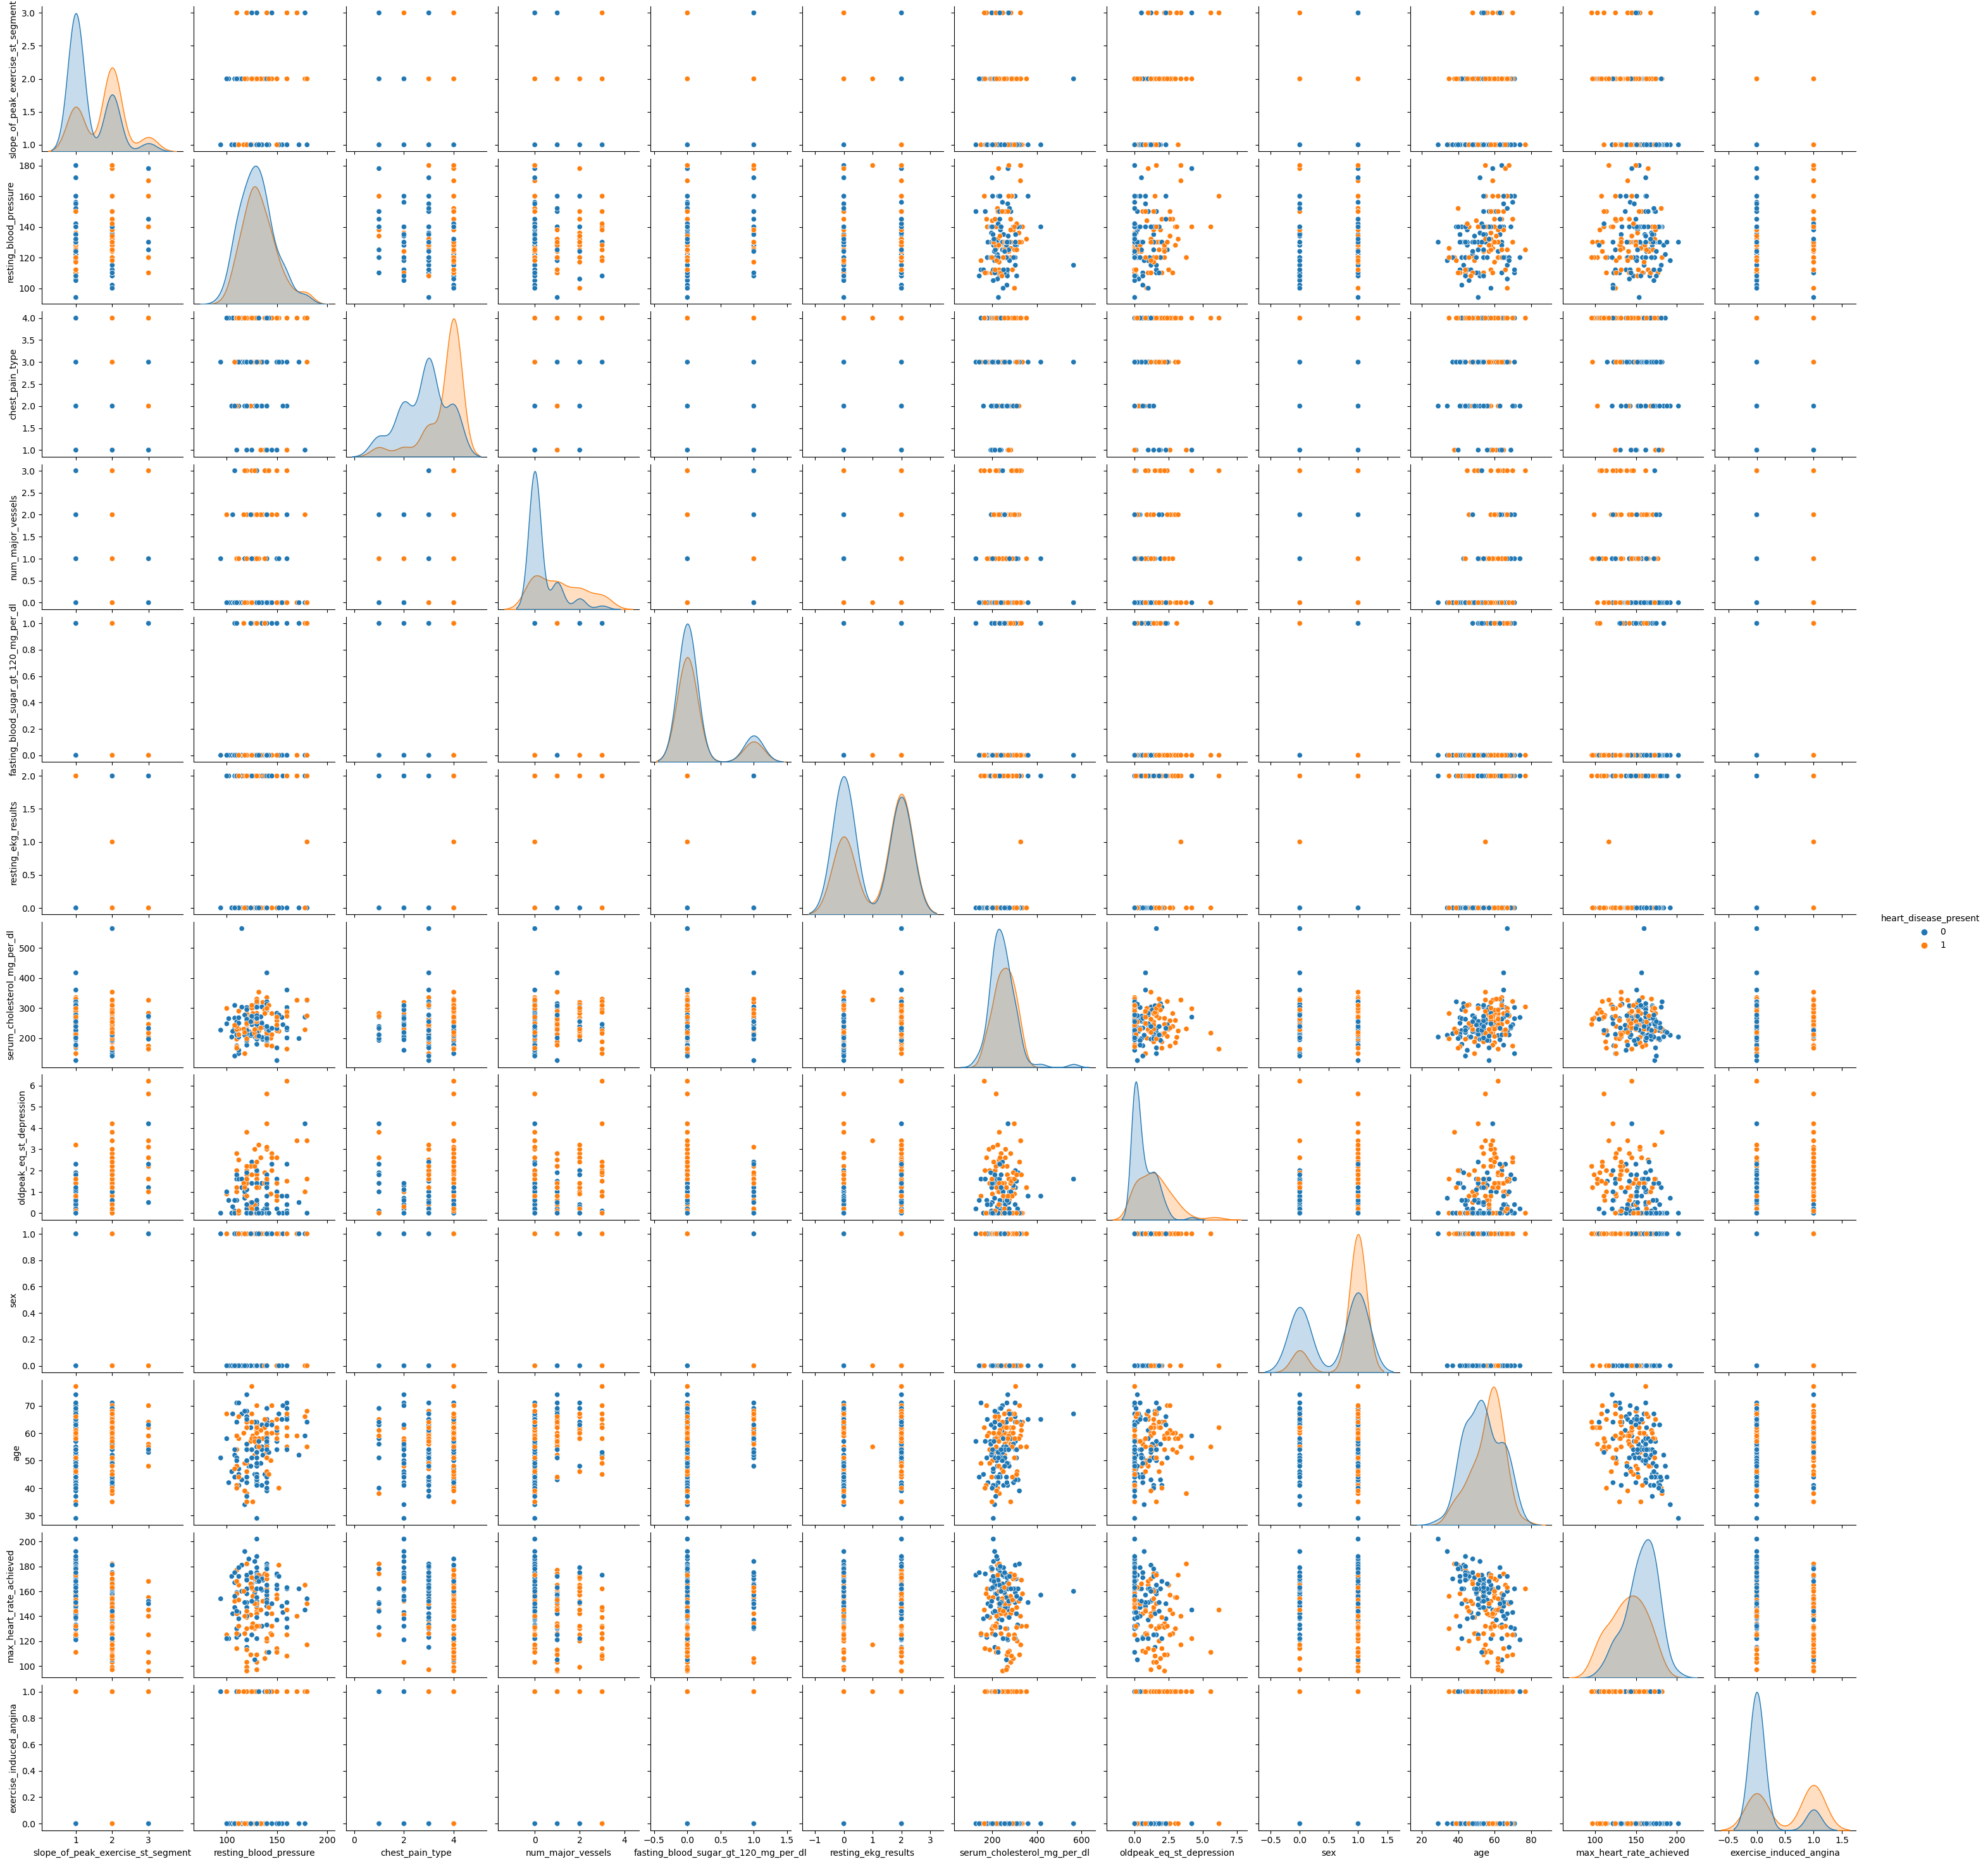

In [25]:
sns.pairplot(dataframe,hue='heart_disease_present')

# Data preprocessing

In [26]:
#check for missing values
dataframe.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### no null values present in this data set

In [27]:
dataframe.duplicated().sum()

0

# convertion of categorical columns into numerical columns

In [28]:
#label encoding
dataframe.patient_id.value_counts()

0z64un    1
sqddbc    1
lpub9d    1
bv01fp    1
9dqkpy    1
         ..
m2a4i9    1
pwigd8    1
qwapdq    1
4sd1xn    1
2nx10r    1
Name: patient_id, Length: 180, dtype: int64

In [29]:
dataframe.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataframe["patient_id"]=le.fit_transform(dataframe.patient_id)
dataframe["thal"]=le.fit_transform(dataframe.thal)


In [31]:
dataframe

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,6,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,147,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,172,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,112,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,133,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,22,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,131,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,5,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


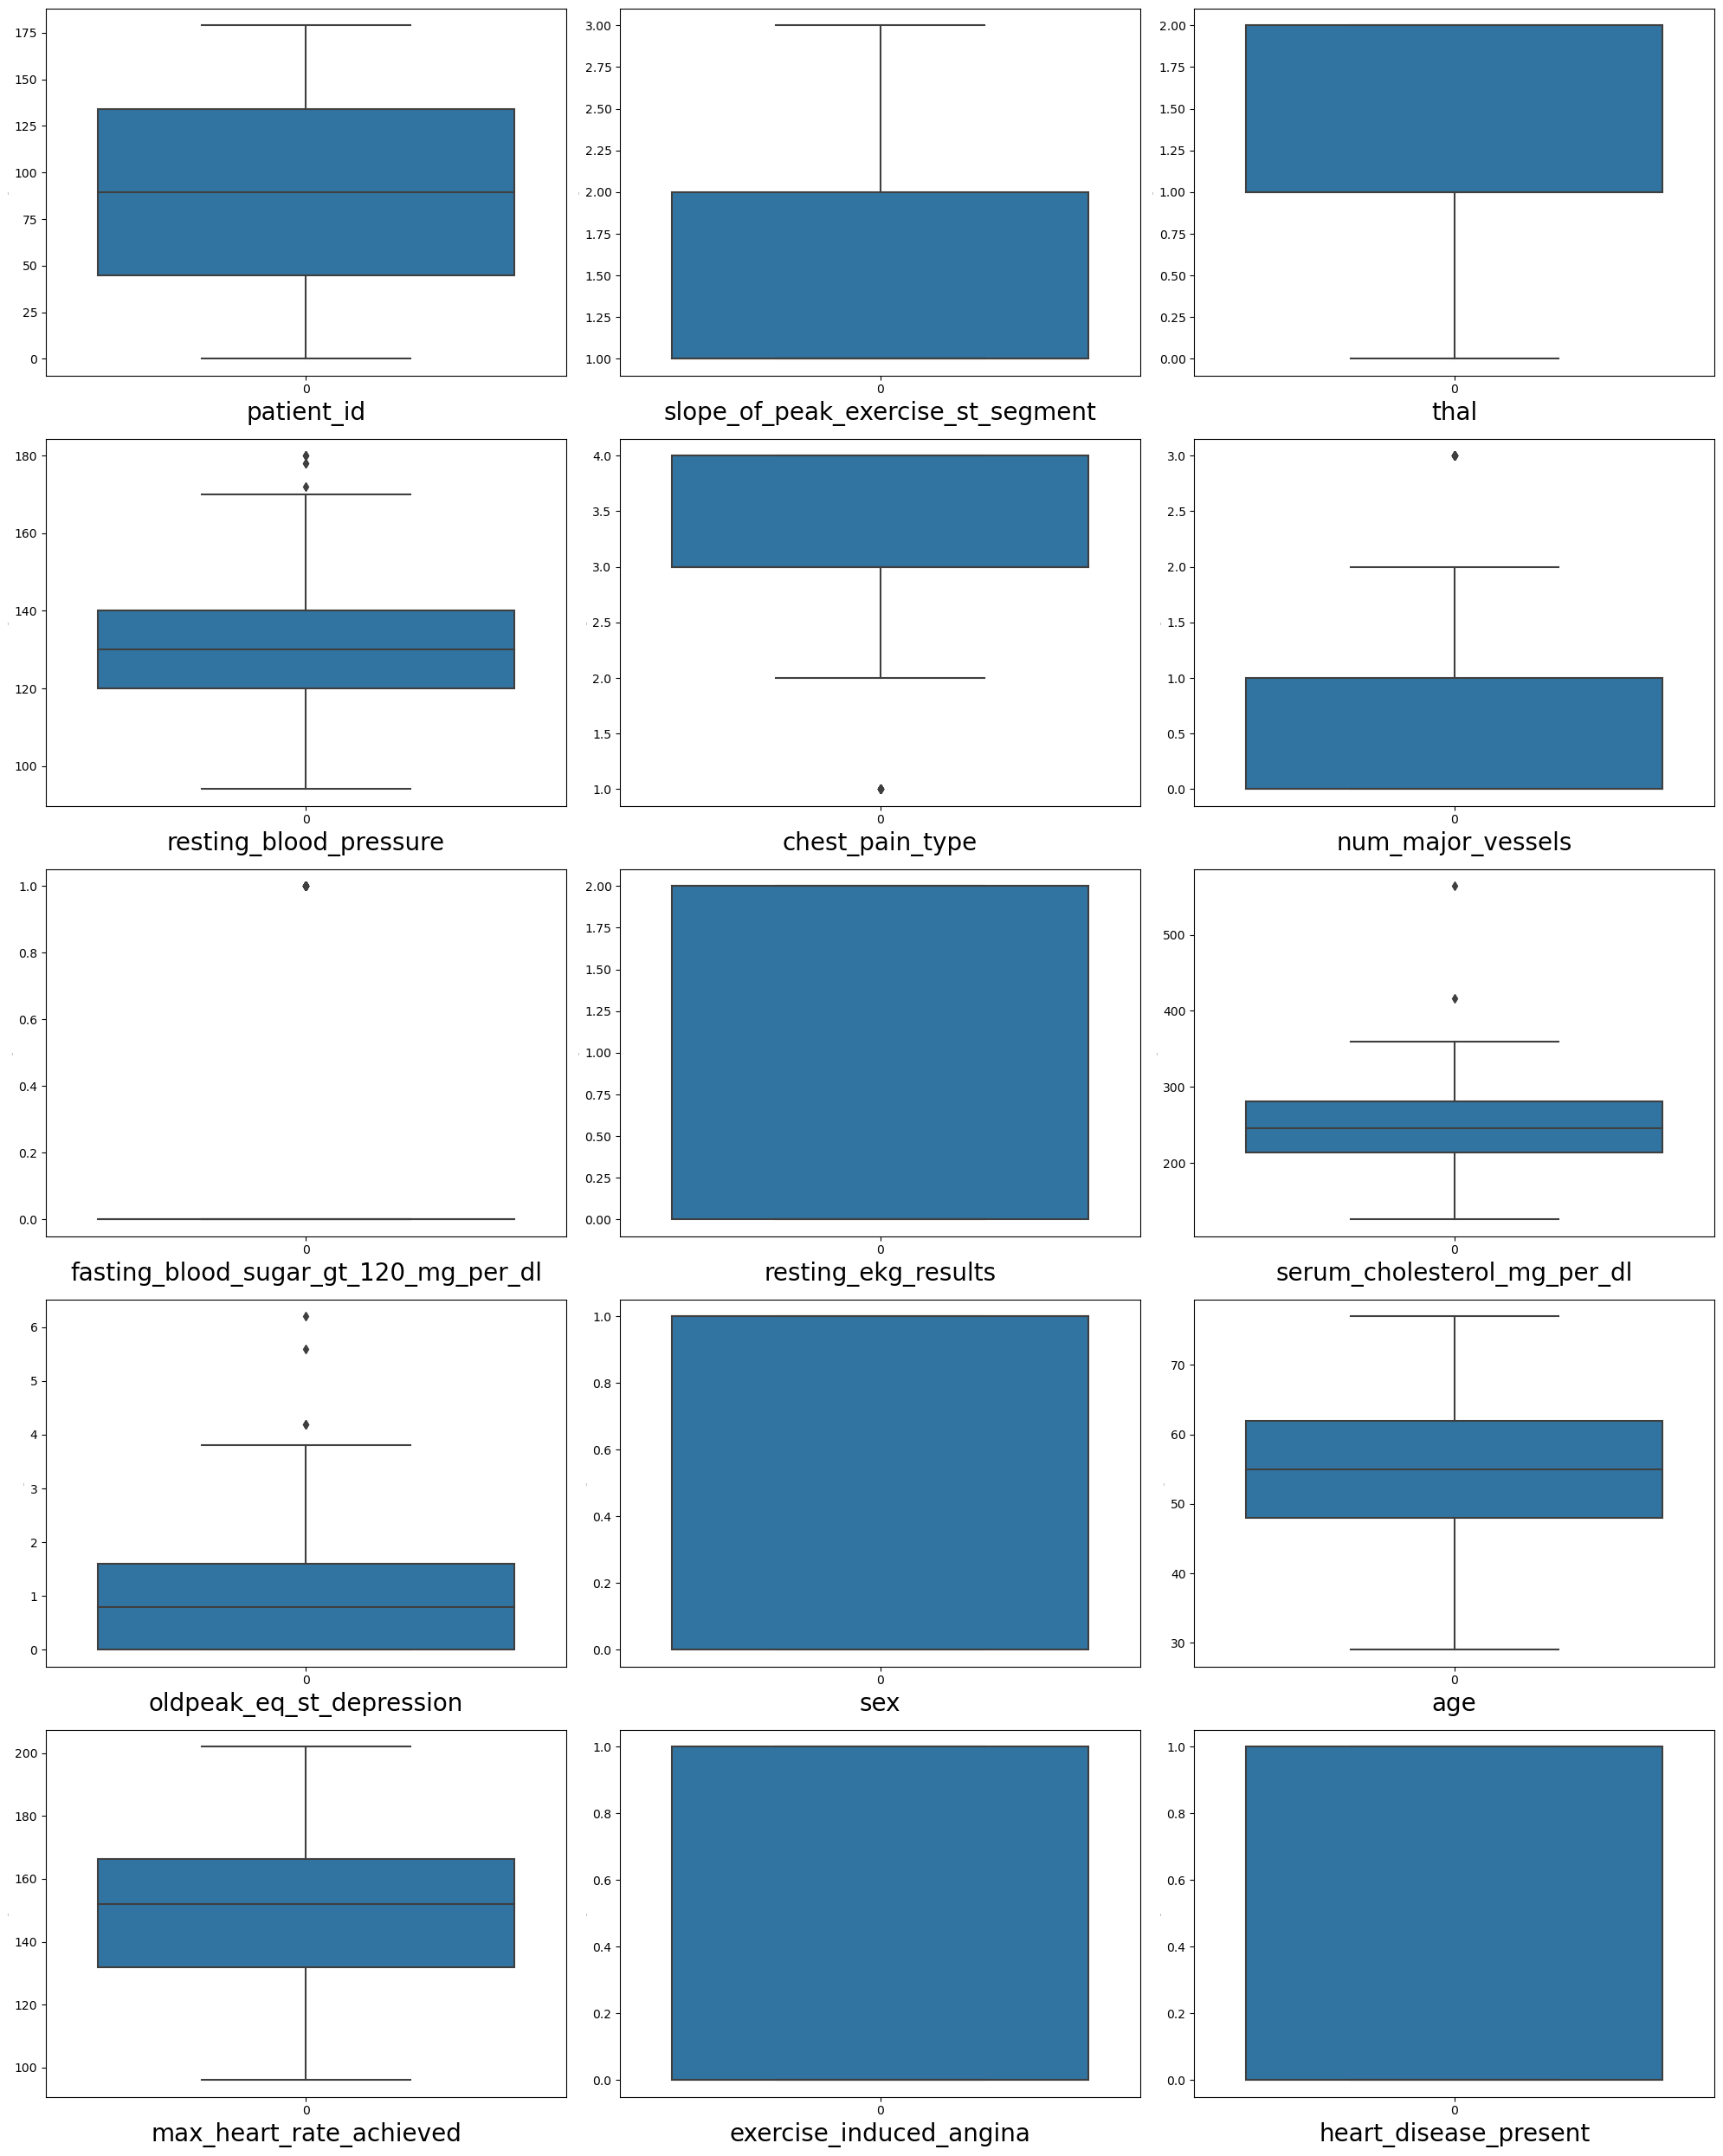

In [32]:
#checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in dataframe:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(dataframe[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=0)
    plotnumber+=1
plt.tight_layout()

# Feature selection

<Axes: >

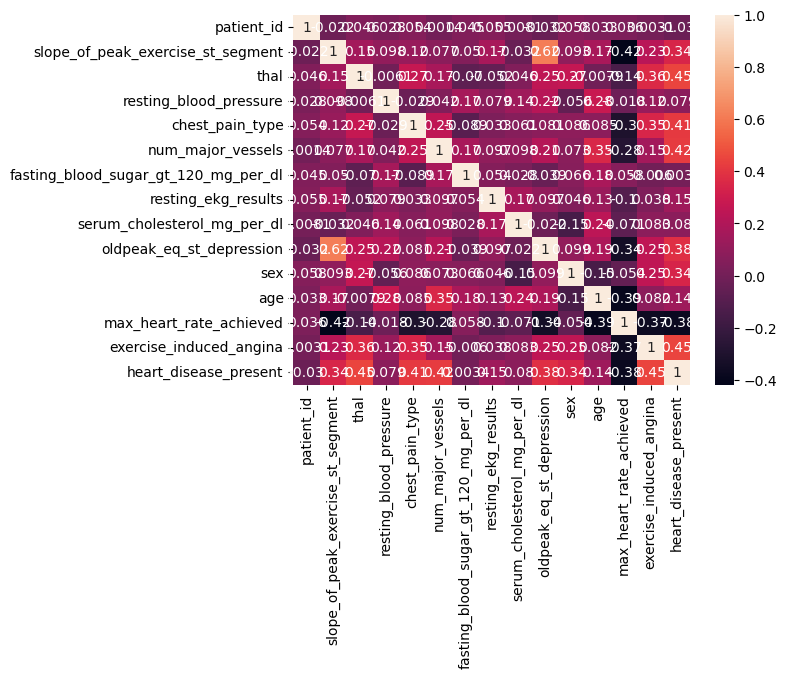

In [33]:
sns.heatmap(dataframe.corr(),annot=True)


# Target and predictor seperation

In [34]:
X=dataframe.iloc[:,:-1]
y=dataframe.heart_disease_present

# Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

#  Model for Logistic Regression¶

In [36]:
#model creation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)


0.8518518518518519


col_0,0,1
heart_disease_present,,
0,26,2
1,6,20


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.91      0.77      0.83        26

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



#  Model for RandomForestClassifier

In [40]:
#model training
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,
                            max_depth=10,
                            max_features=10,
                            criterion='gini',
                           random_state=5,
                           )
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=150,
                       random_state=5)

In [41]:
#model evaluation
from sklearn.metrics import accuracy_score,classification_report
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)


0.7962962962962963

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.86      0.69      0.77        26

    accuracy                           0.80        54
   macro avg       0.81      0.79      0.79        54
weighted avg       0.81      0.80      0.79        54



# Model For K-Nearest Neighbor Algorithm

In [43]:
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
#model evaluation
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6296296296296297


col_0,0,1
heart_disease_present,,
0,26,2
1,18,8


In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72        28
           1       0.80      0.31      0.44        26

    accuracy                           0.63        54
   macro avg       0.70      0.62      0.58        54
weighted avg       0.69      0.63      0.59        54



# Model For Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier(max_depth=2)
model.fit(X,y)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.7407407407407407


# Final Model Implementation
Now, we can apply the best working algorithm (i.e., Logistic Regression) into our model and check whether our model will result in the correct output or not with the help of available data.



# CASE 1 – For Heart Disease data

In [47]:
input_data=(172,1,1,125,4,3,0,2,304,0.0,1,77,162,1)

#chage the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The Person does not have a Heart Disease")
else:
    print("The Person has Heart Disease")

[0]
The Person does not have a Heart Disease


# CASE 2 – For Normal Data

In [48]:
input_data=(147,2,1,110,3,0,0,0,214,1.6,0,54,158,0)

#chage the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The Person does not have a Heart Disease")
else:
    print("The Person has Heart Disease")

[0]
The Person does not have a Heart Disease


# Conclusion:-Model Comparison Report
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 4 models were trained and tested with maximum scores as follows:

Logistic Regression: 85%
Random Forest Classifier: 79%
K Neighbors Classifier : 62%
Decision Tree Classifier: 74%
Logistic Regression is the best score of 85%.

# Report on Challenges faced

""" No challenges faced """
""" Supervised machine learning technique was used because dataset is labeled, where the input data 
    is paired with corresponding output labels.We have done some basic checks and eda(exploratory data analysis)
    to know the relation amomg each other and data preprocessing, to know the null values,outliers  and feature selection for 
    correlation.Model creation and model evaluation ,model creation is to create the suitable models and evaluation for knowing 
    the which model suites for the problem"""
""" And we also used seaborn in EDA ,because seaborn provides insights into the distribution of data """